In [45]:
%matplotlib inline
%load_ext autoreload
%autoreload 2
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import math
try:
#     plt.style.use('belle2')
    plt.style.use('belle2_serif')
#     plt.style.use('belle2_modern')
except OSError:
    print("Please install belle2 matplotlib style")   
px = 1/plt.rcParams['figure.dpi']

from main.data_tools.extract_ntuples import get_pd, get_np
from main.draw_tools.decorations import b2helix, watermark

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [46]:
# get top 10 most frequent names
#n = 10
#dataframe['name'].value_counts()[:n].index.tolist()

In [59]:
base_file_loc =  '/media/jykim/T7/storage/01_recon/trainv2_new_correct_data_sig_ext_sig_bkg/'
phigamma_ccbar = base_file_loc + 'topo/topo_phi_D0_M/topoana.root'

base_filter='Pi0_Prob<0.9  && Pis_charge==1 && D0_M>1.67 && D0_M<2.06 '
variables=['D0_M','D0_cosHel_0','gamma_E','iCascDcyBrP_Dst_0','gamma_genMotherPDG']

pd_phigamma_topo = get_pd(file=phigamma_ccbar, tree=tree,base_filter=base_filter,variables=variables)

In [60]:
n = 15
pd_phigamma_topo['iCascDcyBrP_Dst_0'].value_counts()[:n].index.tolist()

[1, 2, 6, -1, 25, 24, 21, 5, 3, 14, 81, 48, 26, 65, 128]

In [61]:
pd_phigamma_topo['iCascDcyBrP_Dst_0'].value_counts()

 1      652
 2      144
 6       41
-1       38
 25      36
 24      20
 21      19
 5       18
 3       10
 14      10
 81       6
 48       6
 26       5
 65       4
 128      4
 15       3
 43       3
 221      3
 12       3
 59       3
 51       3
 76       3
 141      2
 94       2
 380      2
 111      2
 313      2
 210      1
 468      1
 178      1
 287      1
 54       1
 27       1
 508      1
 133      1
 29       1
 75       1
 98       1
 109      1
 424      1
 121      1
 18       1
 17       1
 11       1
 193      1
 372      1
 350      1
 251      1
 103      1
 131      1
 150      1
 172      1
 161      1
 45       1
 190      1
Name: iCascDcyBrP_Dst_0, dtype: int64

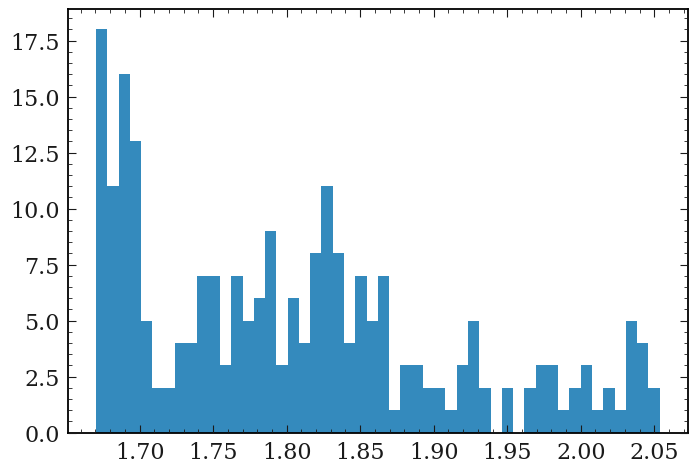

In [62]:
plt.hist( pd_phigamma_topo[(pd_phigamma_topo['iCascDcyBrP_Dst_0']!=6) & (pd_phigamma_topo['iCascDcyBrP_Dst_0']!=1) & (pd_phigamma_topo['iCascDcyBrP_Dst_0']!=2)].D0_M, bins=50);

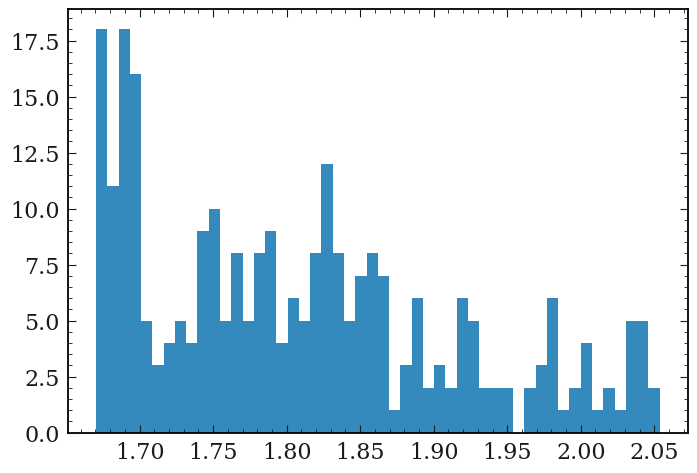

In [63]:
plt.hist( pd_phigamma_topo[(pd_phigamma_topo['iCascDcyBrP_Dst_0']!=1) & (pd_phigamma_topo['iCascDcyBrP_Dst_0']!=2)].D0_M, bins=50);

In [64]:
n = 3
pd_phigamma_topo['gamma_genMotherPDG'].value_counts().index.tolist()

[111.0,
 421.0,
 221.0,
 223.0,
 130.0,
 11.0,
 0.0,
 23.0,
 311.0,
 113.0,
 331.0,
 -433.0,
 -421.0,
 22.0,
 -313.0,
 313.0,
 431.0,
 213.0,
 321.0]

In [65]:
pd_phigamma_topo['gamma_genMotherPDG'].value_counts()

 111.0    849
 421.0    145
 221.0     31
 223.0      8
 130.0      6
 11.0       6
 0.0        5
 23.0       5
 311.0      4
 113.0      2
 331.0      2
-433.0      2
-421.0      1
 22.0       1
-313.0      1
 313.0      1
 431.0      1
 213.0      1
 321.0      1
Name: gamma_genMotherPDG, dtype: int64

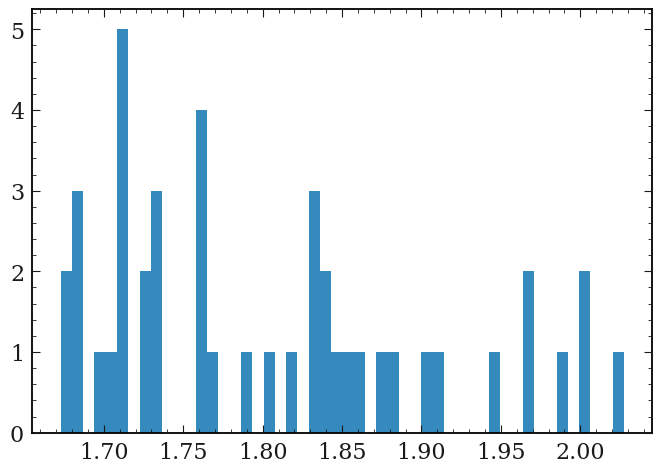

In [44]:
plt.hist( pd_phigamma_topo[pd_phigamma_topo['gamma_genMotherPDG']==221].D0_M, bins=50);

In [4]:
# phigamma_ccbar = base_file_loc + 'ccbar/recon_udst_*.root'
phigamma_uubar = base_file_loc + 'uubar/recon_udst_*.root'
phigamma_ddbar = base_file_loc + 'ddbar/recon_udst_*.root'
phigamma_ssbar = base_file_loc + 'ssbar/recon_udst_*.root'
phigamma_charged = base_file_loc + 'charged/recon_udst_*.root'
phigamma_mixed = base_file_loc + 'mixed/recon_udst_*.root'
phigamma_taupair = base_file_loc + 'taupair/recon_udst_*.root'

base_filter='Pi0_Prob<0.85  && Pis_charge==1 && D0_M>1.67 && D0_M<2.06 '

#base_filter='Pi0_Prob<0.90  && D0_M>1.67 && D0_M<2.06 '

# base_filter='Pi0_Prob<0.95 && phi_rank_Dstp==1 && D0_M>1.67 && D0_M<2.06'

#ccbar_filter='Pi0_Prob<0.9 && Pis_charge==1 && D0_M>1.67 && D0_M<2.06 && (iCascDcyBrP_Dst_0 !=1 && iCascDcyBrP_Dst_0 !=2)'
# ccbar_filter='Pi0_Prob<0.9 && Pis_charge==1 && D0_M>1.67 && D0_M<2.06 '


#ccbar_filter='Pi0_Prob<0.9 && D0_M>1.67 && D0_M<2.06 && (iCascDcyBrP_D0_0 !=0 ) && (phi_rank_Dstp ==1)'

variables=['D0_M','D0_cosHel_0','gamma_E']
tree='phi'

In [5]:
phipi0_filter=' Pi0_Prob<0.85  && Pis_charge==1 && D0_M>1.67 && D0_M<2.06 && iCascDcyBrP_Dst_0==1 && iCascDcyBrP_Dst_0!=2 '
except_phipi0_filter='Pi0_Prob<0.85  && Pis_charge==1 && D0_M>1.67 && D0_M<2.06 && iCascDcyBrP_Dst_0!=1 && iCascDcyBrP_Dst_0!=2 '
signal_filter=' Pi0_Prob<0.85  &&  Pis_charge==1 && D0_M>1.67 && D0_M<2.06 && iCascDcyBrP_Dst_0==2'